<a href="https://colab.research.google.com/github/robertocannella/Latitude42/blob/main/Course2Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

medford_oregon_weather = pd.read_csv('/content/drive/MyDrive/resources/Course2/medford_oregon_temps.csv')
ann_arbor_weather = pd.read_csv('/content/drive/MyDrive/resources/Course2/ann_arbor_temps.csv')
boston_weather = pd.read_csv('/content/drive/MyDrive/resources/Course2/boston_ma_temps.csv')


mw = medford_oregon_weather[['DATE','TMAX']]
aw = ann_arbor_weather[['DATE','TMAX']]
bw = boston_weather[['DATE','TMAX']]
bw = bw[~(bw['DATE'] < '2013-01-01')]


data_sets = [bw,mw,aw]

for n, set in enumerate(data_sets):
  set['DATE'] = pd.to_datetime(set['DATE'])
  set.dropna(inplace=True)
  set['YEAR'] = pd.DatetimeIndex(set['DATE']).year.astype(int)
  set['MONTH'] = pd.DatetimeIndex(set['DATE']).month.astype(int)
  set['DAY'] = pd.DatetimeIndex(set['DATE']).day.astype(int)
  data_sets[n] = set.groupby([bw['MONTH'],bw['DAY']])['TMAX'].agg(['max'])


data_sets[0].loc[6]

In [451]:
merged = pd.merge(data_sets[0], data_sets[1], how='inner', left_index=True, right_index=True)
merged = pd.merge(merged, data_sets[2], how='inner', left_index=True, right_index=True)

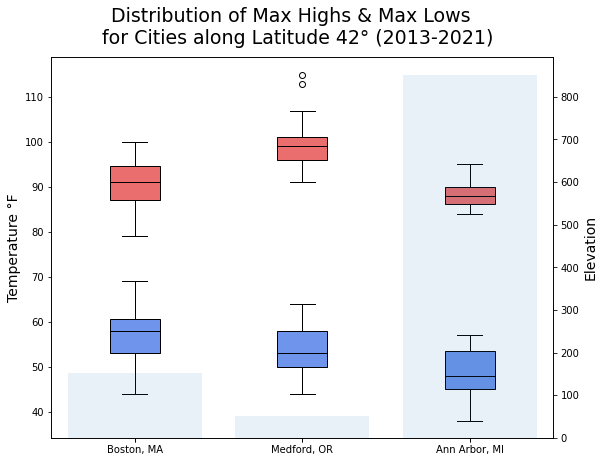

In [454]:
june_sets = []
december_sets = []

for set in data_sets:
  june_sets.append(set.loc[6])
  december_sets.append(set.loc[12])

for n, set in enumerate(december_sets):
  set.reset_index(inplace=True)
  december_sets[n] = set['max']

for n, set in enumerate(june_sets):
  set.reset_index(inplace=True)
  june_sets[n] = set['max']


fig, ax1 = plt.subplots(figsize=(9,7))

fig.suptitle('Distribution of Max Highs & Max Lows \n for Cities along Latitude 42° (2013-2021)', fontsize=19)
ax1.boxplot(december_sets,
            patch_artist=True, 
            boxprops=dict(facecolor="#6e94eb"),
            medianprops=dict(color="black"))
ax1.boxplot(june_sets, 
            patch_artist=True, 
            boxprops=dict(facecolor="#eb6e6e"),
            medianprops=dict(color="black"))
ax1.set_ylabel('Temperature °F', fontsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Elevation',fontsize=14)

ax2.bar([1,2,3], [151,52,850], alpha=.1, zorder=-0)

for axis in plt.gcf().get_axes():
  axis.set_xticklabels(['Boston, MA', 'Medford, OR','Ann Arbor, MI'])

